In [1]:
import pandas as pd
from ast import literal_eval
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import seaborn as sns
import matplotlib
cmap = matplotlib.colormaps['viridis']

In [2]:
variable_df = pd.read_csv('data/results_variable_2.csv', sep='\t',
                             converters= {'GWM_S_predict_local': literal_eval,
                                          'Local_S_predict_local': literal_eval,
                                          'S_i_plus_1_classic': literal_eval,
                                          'P_imp':literal_eval,
                                          'S0': literal_eval
                                          })

In [3]:
variable_df.columns

Index(['q', 'total_sim_time', 'S0', 'well_loc_idx', 'well_loc', 'P_imp',
       'GWM_S_predict_local', 'Local_S_predict_local', 'P_i_plus_1_classic',
       'S_i_plus_1_classic', 'nb_newton_classic', 'dt_sim_classic',
       'norms_classic', 'GWM_S_i_plus_1_hybrid', 'GWM_P_i_plus_1_hybrid',
       'GWM_nb_newton_hybrid', 'GWM_dt_sim_hybrid', 'GWM_norms_hybrid',
       'Local_S_i_plus_1_hybrid', 'Local_P_i_plus_1_hybrid',
       'Local_nb_newton_hybrid', 'Local_dt_sim_hybrid', 'Local_norms_hybrid',
       'S_DD_local', 'P_DD_local', 'S_i_plus_1_DD', 'P_i_plus_1_DD',
       'nb_newton_DD', 'dt_sim_DD', 'norms_DD'],
      dtype='object')

In [4]:
i = 0

0


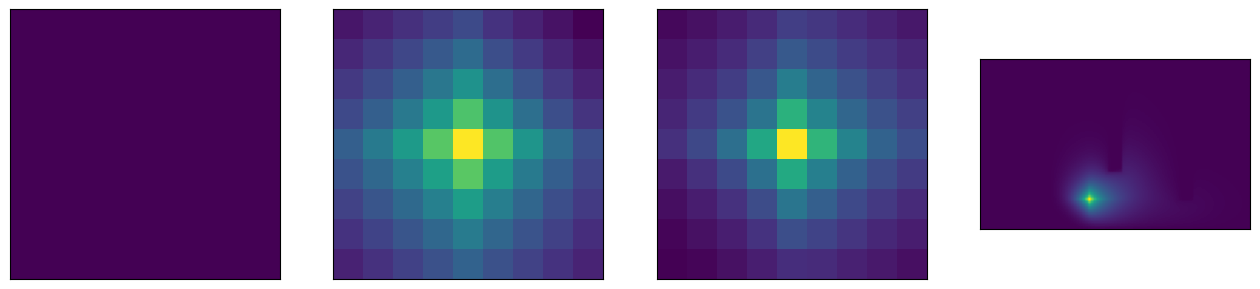

In [5]:
sample = variable_df.loc[37]
print(i)
fig, axs = plt.subplots(1, 4, figsize=(16, 4))
axs[0].imshow(np.full((9,9), sample['S0']))
axs[1].imshow(np.array(sample['Local_S_predict_local']).reshape(9, 9).T)
axs[2].imshow(np.array(sample['GWM_S_predict_local']).reshape(9, 9).T)
axs[3].imshow(np.array(sample['S_i_plus_1_classic']).reshape(95, 60).T)

for ax in axs:
    ax.invert_yaxis()
    ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())

plt.show()
i+=1

### Global CO2 storage simulation

In [11]:
import sys
import os

# Adjust the sys.path to include the src directory
current_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_dir, '../../../../..', '')))
print("Path setup complete.")

Path setup complete.


In [12]:
from yads.mesh.utils import load_json

In [13]:
grid = load_json("../../../../../meshes/SHP_CO2/2D/SHP_CO2_2D_S.json")

# Permeability barrier zone creation
barrier_1 = grid.find_cells_inside_square((1000.0, 2000.0), (1250.0, 0))
barrier_2 = grid.find_cells_inside_square((2250.0, 3000.0), (2500.0, 1000.0))
barrier_3 = grid.find_cells_inside_square((3500.0, 3000.0), (3750.0, 500.0))

K = np.full(grid.nb_cells, 0)
permeability_barrier = 1
K[barrier_1] = permeability_barrier
K[barrier_2] = permeability_barrier
K[barrier_3] = permeability_barrier

K_np = K.reshape((95, 60)).T

value_to_plot = 1

# Create a mask for the value_to_plot
masked_array = np.ma.masked_where(K_np != value_to_plot, K_np)
cmap = plt.cm.get_cmap('Greens')
cmap.set_under(color='white', alpha=0)  


/var/folders/lb/7819f89d69v17j4h5j74p8kc0000gp/T/ipykernel_1395/1944050796.py:20: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Greens')


In [14]:
from matplotlib.colors import ListedColormap

well_loc = np.full(grid.nb_cells, 0)
well_loc[sample['well_loc_idx']] = 1.
well_loc = well_loc.reshape(95, 60).T

value_to_plot = 1

well_masked = np.ma.masked_where(well_loc != value_to_plot, well_loc)
# cmap_red = plt.cm.get_cmap('Reds')
# cmap_red.set_under(color='white', alpha=0) 
cmap_red =  ListedColormap(['white', 'red'])

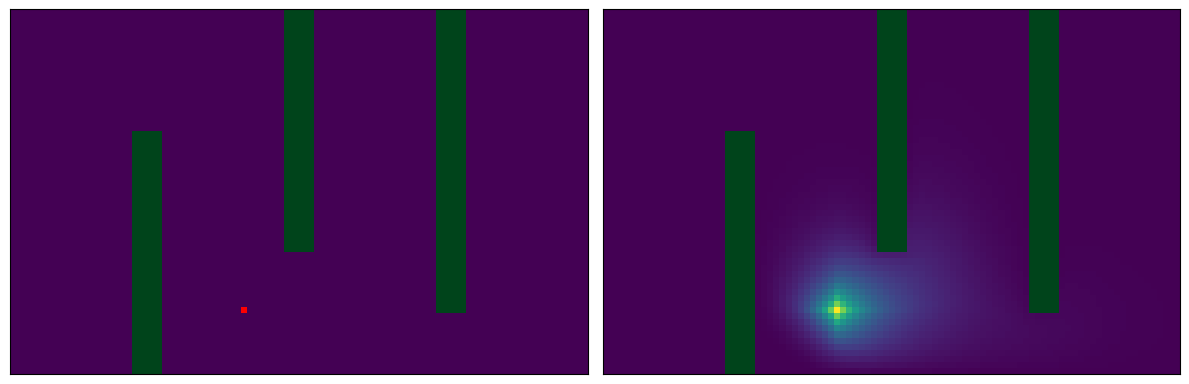

In [98]:
sample = variable_df.loc[37]
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(np.full((60,95), sample['S0']))
axs[0].imshow(masked_array, cmap=cmap, interpolation='nearest', vmin=0.5)
axs[0].imshow(well_masked, cmap=cmap_red, interpolation='nearest', vmin=0.5)

axs[1].imshow(np.array(sample['S_i_plus_1_classic']).reshape(95, 60).T)
axs[1].imshow(masked_array, cmap=cmap, interpolation='nearest', vmin=0.5)

for ax in axs:
    ax.invert_yaxis()
    ax.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    ax.yaxis.set_major_locator(matplotlib.ticker.NullLocator())
fig.tight_layout()
plt.savefig('GA_Global_sim.pdf', bbox_inches="tight")
plt.show()

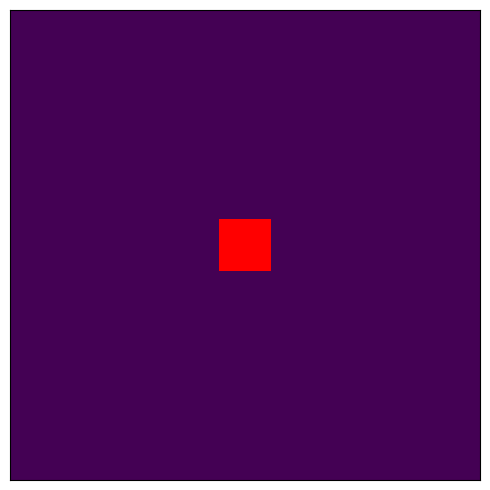

In [16]:
well_small = np.full(81, 0)
well_small[40] = 1.
well_small = well_small.reshape(9, 9).T

value_to_plot = 1

well_small = np.ma.masked_where(well_small != value_to_plot, well_small)
cmap_red =  ListedColormap(['white', 'red'])


fig, axs = plt.subplots(1, 1, figsize=(12, 5))
axs.imshow(np.full((9,9), sample['S0']))
axs.imshow(well_small, cmap=cmap_red, interpolation='nearest', vmin=0.5)
axs.invert_yaxis()
axs.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
axs.yaxis.set_major_locator(matplotlib.ticker.NullLocator())
fig.tight_layout()
plt.savefig('GA_local_S0.pdf', bbox_inches="tight")
plt.show()

### Prediction for preconditioning

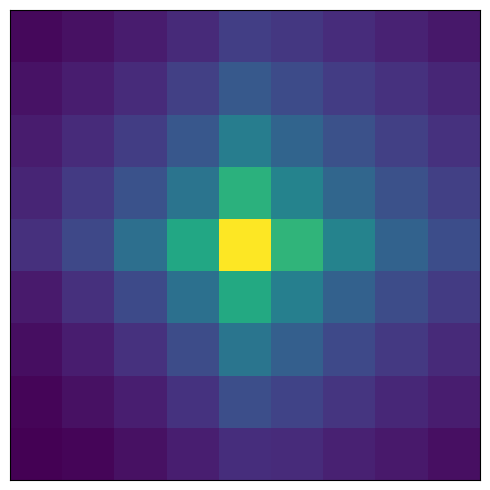

In [104]:
sample = variable_df.loc[37]
fig, axs = plt.subplots(1, 1, figsize=(5, 5))
axs.imshow(np.array(sample['GWM_S_predict_local']).reshape(9, 9).T)

axs.invert_yaxis()
axs.xaxis.set_major_locator(matplotlib.ticker.NullLocator())
axs.yaxis.set_major_locator(matplotlib.ticker.NullLocator())
fig.tight_layout()
plt.savefig('GA_GWM_pred.pdf', bbox_inches="tight")
plt.show()

### Synthetic dataset on small domain

In [2]:
GWM_df = pd.read_csv('../data/gwm_dataset_3100.csv', sep='\t',
                             converters= {'P_imp': literal_eval,
                                          'P': literal_eval,
                                          'S0': literal_eval,
                                          'S':literal_eval
                                          })

In [6]:
GWM_test_df = pd.read_csv('../data/test_gwm_dataset_3100.csv', sep='\t',
                             )
print(len(GWM_test_df))

GWM_test_df = pd.read_csv('../data/train_gwm_dataset_3100.csv', sep='\t',
                             )
print(len(GWM_test_df)/len(GWM_df))

22320
0.8


In [3]:
GWM_df.columns
print(len(GWM_df))

111600


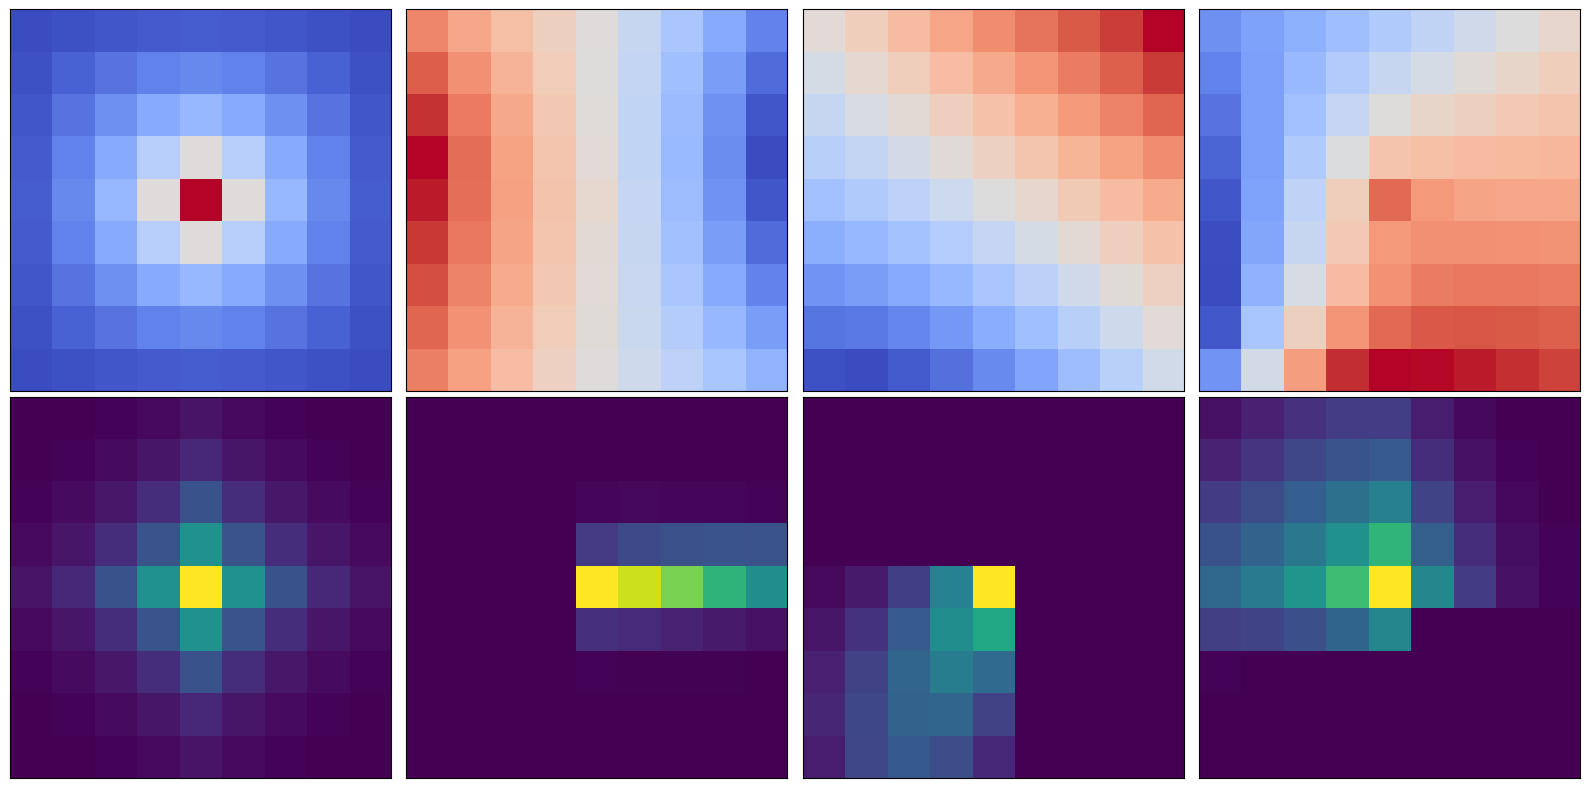

In [409]:
fig, axs = plt.subplots(2, 4, figsize=(16, 8))
samples = [GWM_df.loc[9], GWM_df.loc[3788], GWM_df.loc[3789], GWM_df.loc[13668]]

for i, sample in enumerate(samples):
    axs[1][i].imshow(np.array(sample['S']).reshape(9, 9).T)
    axs[0][i].imshow(np.array(sample['P_imp']).reshape(9, 9).T, cmap='coolwarm')
    # axs[0][i].plot(4, 4, marker='o', color='red', markersize=20)


    axs[0][i].invert_yaxis()
    axs[1][i].invert_yaxis()

    axs[0][i].xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    axs[0][i].yaxis.set_major_locator(matplotlib.ticker.NullLocator())

    axs[1][i].xaxis.set_major_locator(matplotlib.ticker.NullLocator())
    axs[1][i].yaxis.set_major_locator(matplotlib.ticker.NullLocator())

fig.tight_layout()
plt.savefig('GA_GWM_dataset.pdf', bbox_inches="tight")
plt.show()